# Performance Overview Of The Models

## Transformer

Test Loss: 0.007010

Resource usage summary:

    CPU time :                                   1492.29 sec.
    Max Memory :                                 3237 MB
    Average Memory :                             2654.00 MB
    Total Requested Memory :                     8192.00 MB
    Delta Memory :                               4955.00 MB
    Max Swap :                                   -
    Max Processes :                              4
    Max Threads :                                16
    Run time :                                   1533 sec.
    Turnaround time :                            1504 sec.

## Informer

Test Loss: 0.006674


Resource usage summary:

    CPU time :                                   1831.73 sec.
    Max Memory :                                 3226 MB
    Average Memory :                             3171.14 MB
    Total Requested Memory :                     20480.00 MB
    Delta Memory :                               17254.00 MB
    Max Swap :                                   -
    Max Processes :                              4
    Max Threads :                                13
    Run time :                                   1841 sec.
    Turnaround time :                            1886 sec.

The output (if any) is above this job summary.



## Visualization


In [1]:
import re
from pathlib import Path
import matplotlib.pyplot as plt

# Patterns to match your log format
EPOCH_RE = re.compile(
    r"Epoch\s+(\d+)/\d+\s*\|\s*Train Loss:\s*([0-9.eE+-]+)\s*\|\s*Val Loss:\s*([0-9.eE+-]+)"
)
TEST_RE = re.compile(r"Test Loss:\s*([0-9.eE+-]+)")


In [2]:
def parse_log(path):
    """
    Parse a training log file with lines like:
    Epoch 1/400 | Train Loss: ... | Val Loss: ...
    Test Loss: ...
    """
    path = Path(path)
    epochs = []
    train_losses = []
    val_losses = []
    test_loss = None

    with path.open("r") as f:
        for line in f:
            line = line.strip()

            # Epoch line
            m = EPOCH_RE.search(line)
            if m:
                epoch = int(m.group(1))
                train = float(m.group(2))
                val = float(m.group(3))
                epochs.append(epoch)
                train_losses.append(train)
                val_losses.append(val)
                continue

            # Test loss line
            t = TEST_RE.search(line)
            if t:
                test_loss = float(t.group(1))

    return {
        "epochs": epochs,
        "train": train_losses,
        "val": val_losses,
        "test_loss": test_loss,
        "name": path.stem,
    }


In [3]:
def plot_runs(log_paths):
    """
    log_paths: list of paths to log files (strings or Path objects)
    """
    runs = [parse_log(p) for p in log_paths]

    # Filter out any empty parses
    runs = [r for r in runs if r["epochs"]]
    if not runs:
        print("No valid runs parsed.")
        return

    fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

    for run in runs:
        name = run["name"]
        epochs = run["epochs"]
        train = run["train"]
        val = run["val"]
        test_loss = run["test_loss"]

        # Train loss curve
        ax_train.plot(epochs, train, label=name)
        ax_train.scatter(epochs[-1], train[-1])  # final point marker

        # Val loss curve
        ax_val.plot(epochs, val, label=name)
        ax_val.scatter(epochs[-1], val[-1])      # final point marker

        # Annotate test loss near the last val point (if available)
        if test_loss is not None:
            ax_val.annotate(
                f"Test: {test_loss:.6f}",
                xy=(epochs[-1], val[-1]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=8,
            )

    ax_train.set_title("Train Loss")
    ax_train.set_xlabel("Epoch")
    ax_train.set_ylabel("Loss")
    ax_train.set_yscale("log")
    ax_train.grid(True, alpha=0.3)
    ax_train.legend()

    ax_val.set_title("Validation Loss")
    ax_val.set_xlabel("Epoch")
    ax_val.set_ylabel("Loss")
    ax_val.set_yscale("log")
    ax_val.grid(True, alpha=0.3)
    ax_val.legend()

    fig.suptitle("Training & Validation Loss over Epochs", fontsize=14)
    fig.tight_layout()
    plt.show()


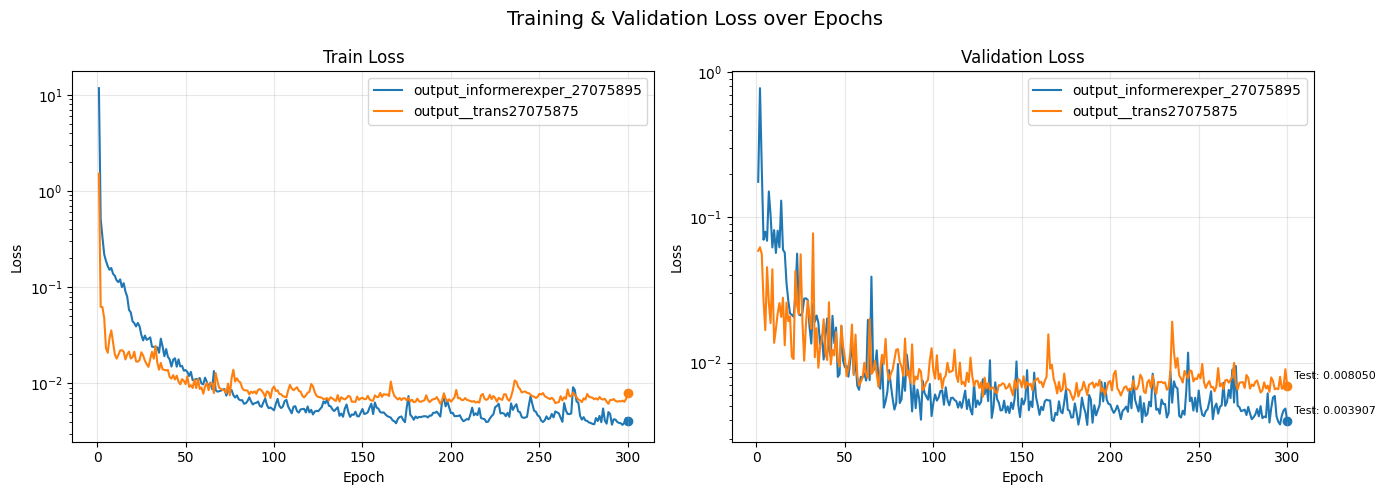

In [4]:
plot_runs([
    "/zhome/63/7/219953/DeepLearning-1/import_performance_log_files/output_informerexper_27075895.log",
    "/zhome/63/7/219953/DeepLearning-1/import_performance_log_files/output__trans27075875.log",
])
